In [78]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import kurtosis 
import statsmodels
import pandas as pd
import statsmodels


In [184]:
T = 1965
kappa0 = 0.08
alpha0 = 1/7
beta0 = 0.1
gamma0 = 50
sigma0 = 1
lambdaa0 = 1
l = 1000
K = 4



In [38]:
#model

def modelMCB(kappa,beta,lambdaa,alpha):
  
  p=np.zeros(T)
  v=np.zeros(T)
  v[0]=5
  m=np.zeros(T)
  epsilon = np.random.normal(0,sigma0,(1,T))

  for i in range(1,T-1):
    p[i+1]=p[i] + kappa*(v[i]-p[i])  + beta*np.tanh(gamma0*m[i]) + epsilon[0,i+1]
    m[i]= (1-alpha)*m[i-1] + alpha*(p[i]-p[i-1])
    v[i+1]=(1-lambdaa)*v[i] + lambdaa*p[i]

  return(p,m,v) 



[ 0.00000000e+00  0.00000000e+00  7.73208017e-01  1.14183734e+00
  2.01661763e-01  2.65343028e+00  2.26634198e+00  8.73938667e-01
  6.23725802e-01  1.22344556e+00  7.82494846e-01  1.06073213e+00
  9.72141362e-01  3.01144203e+00  3.78652731e+00  3.51811060e+00
  4.13244556e+00  5.23181141e+00  3.56021508e+00  4.06651794e+00
  3.03101795e+00  1.49230375e+00 -4.14130651e-01 -1.45045447e+00
 -1.94777221e+00 -2.76562526e+00 -2.53217519e+00 -2.19027342e+00
 -3.29602765e+00 -4.92987991e+00 -3.49939880e+00 -3.37935580e+00
 -4.58755306e+00 -7.00920804e+00 -7.28451377e+00 -7.78497782e+00
 -8.93106941e+00 -6.77093069e+00 -6.37360601e+00 -3.99054253e+00
 -3.85763564e+00 -4.48565826e+00 -4.01488931e+00 -4.56741284e+00
 -4.35155199e+00 -4.55376472e+00 -3.69985441e+00 -3.18820082e+00
 -2.51820606e+00 -2.37177768e+00 -1.43366598e+00 -4.13196092e-01
  5.39549489e-01  1.71910531e-02  3.93105754e-01  9.80546841e-01
  1.11700484e+00  5.44684847e-01  2.86845267e-01  1.27947458e+00
  1.53408868e+00  2.47547

In [32]:
#estimators function

def momentk(r,k):
    return  np.mean(np.power(r,k))

def acf(r):
    return statsmodels.tsa.stattools.acf(r)[1]

def pacf(r):
     return statsmodels.tsa.stattools.pacf(r)[1]
     


In [58]:
#we define the data we have to fit 




R = np.array([np.diff(modelMCB(kappa0,beta0,lambdaa0,alpha0)[0]) for i in range(l)])
   
parameters= None 

#an other way to compute 

def DW(kappa,beta,lambdaa,alpha,j):

    if parameters == None :
        W = np.identity(K)
    else :
        W = np.linalg.inv(np.cov(parameters))    
    
    pabm = modelMCB(kappa,beta,lambdaa,alpha)[0]
    rabm = np.diff(pabm)
    x = np.zeros((4,0))
    x[0] = momentk(rabm,1)-momentk(R[j],1)
    x[1] = momentk(rabm,1)-momentk(R[j],1)
    x[2] = -kurtosis(R[j])+kurtosis(rabm)
    x[3] = acf(rabm)-acf(R[j])
    return np.matmul(x,np.matmul(W,x.T))




(1000, 999)


In [61]:
#Investors behaviour

df = pd.read_csv("ZEL_Prices.csv")

#we took the close price as reference price 

price = df["close"]

0       3.60
1       3.46
2       3.33
3       3.46
4       3.42
        ... 
1959    7.71
1960    7.83
1961    7.77
1962    7.96
1963    7.92
Name: close, Length: 1964, dtype: float64


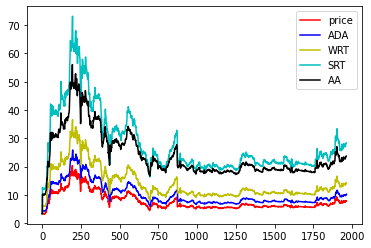

In [76]:
#function witch became finally useless, but still interesting to have

def ADA():
    P = [3.4,3.4]
    for i in price:
        P.append(0.65*i+0.5*P[-1])
    return P

def WRT():
    P = [3.4,3.4]
    for i in range (2,len(price)):
        P.append(price[i-1]+0.4*(price[i-1]+price[i-2]))
    return P

def SRT():
    P = [3.4,3.4]
    for i in range (2,len(price)):
        P.append(price[i-1]+1.3*(price[i-1]+price[i-2]))
    return P

def AA():
    P = [3.4,3.4]
    for i in range (2,len(price)):
        P.append(0.5*(np.mean(price[:i])+price[i])+price[i]+price[i-1])
    return P

plt.plot(price,label = "price",c = "r")
plt.plot(ADA(),label = "ADA", c ="b")
plt.plot(WRT(),label = "WRT",c = "y")
plt.plot(SRT(),label= "SRT", c = "c")
plt.plot(AA(),label= "AA", c = "k")
plt.legend()
plt.show()


In [94]:

df_Investors = pd.read_csv("ZEL_Investors.csv")


In [199]:
#the use of group by help to separate each investors

A = df_Investors.groupby(by = "investor_id")


In [195]:
#Computing each term of the model based on the real data

def modelMCB_separated(kappa,beta,lambdaa,alpha):
  
  p=np.zeros(T)
  v=np.zeros(T)
  v[0]=5
  m=np.zeros(T)
  A = []
  B = []

  for i in range(1,T-1):
    A.append(kappa*(v[i]-price[i]))
    B.append(beta*np.tanh(gamma0*m[i-1]))
    m[i]= (1-alpha)*m[i-1] + alpha*(price[i]-price[i-1])
    v[i+1]=(1-lambdaa)*v[i] + lambdaa*price[i]

  return(A,B) 


In [201]:
#we computed 10 times the signal with paramter randomly distributed arround a reasonnable value

L = [ modelMCB_separated(kappa0+np.random.normal(0,0.1),beta0+np.random.normal(0,0.1),lambdaa0+np.random.normal(0,0.1),alpha0+np.random.normal(0,0.1)) for i in range (10) ]



change_of_invetory = []


for i in A.groups.keys():
    change_of_invetory.append(np.array(A.get_group(i)["position"].diff())[1:])


In [202]:
res = []


for i in range (len(change_of_invetory)):
    a = 0
    b = 0
    # print(i)
    for j in range (10):

        if np.corrcoef(L[j][0],change_of_invetory[i])[0,1]>np.corrcoef(L[j][1],change_of_invetory[i])[0,1]:
            a+=1
        else :
            b+=1
    if a<b:
        res.append(1)
    else : 
        res.append(0)

        




c:\Users\teof\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\teof\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(array([47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 32.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

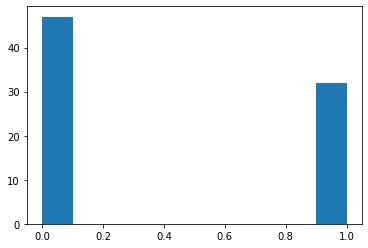

In [203]:
plt.hist(res)

In [204]:
#same job for two periods

change_of_invetory_bis = []

for i in A.groups.keys():
    change_of_invetory_bis.append(np.array_split(np.array(A.get_group(i)["position"].diff())[1:],2))



In [206]:
res_periode1 = []
res_periode2 = []

for i in range (len(change_of_invetory)):
    a1 = 0
    b1 = 0
    a2 = 0
    b2 = 0
    for j in range (10):
        A = np.array_split(L[j][0],2)
        B = np.array_split(L[j][1],2)


        if np.corrcoef(A[0][:981],change_of_invetory_bis[i][0][:981])[0,1]>np.corrcoef(B[0][:981],change_of_invetory_bis[i][0][:981])[0,1]:
            a1+=1
        else :
            b1+=1
        if np.corrcoef(A[1][:981],change_of_invetory_bis[i][1][:981])[0,1]>np.corrcoef(B[1][:981],change_of_invetory_bis[i][1][:981])[0,1]:
            a2+=1
        else :
            b2+=1

    if a1<b1 :
        res_periode1.append(1)
    else : 
        res_periode1.append(0)
    if a2<b2 :
        res_periode2.append(1)
    else : 
        res_periode2.append(0)
    


c:\Users\teof\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\teof\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(array([35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 44.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

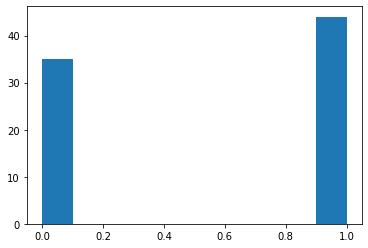

In [207]:
plt.hist(res_periode1)

(array([33.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

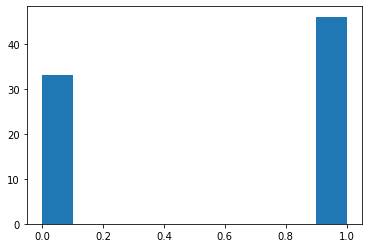

In [208]:
plt.hist(res_periode2)